In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    

df = pd.read_csv("./selenium-firefox/final_01.csv",sep=',') #read from file

df.dropna(inplace=True)  #remove none values


 

In [2]:
#create a new column where the values are the length of the awards list

df['awards']=df['awards'].str.split(',')
df['awards_int'] = df['awards'].str.len()
df['awards_int'] = df['awards_int'].astype(int)
df['original_publish_year'] = df['original_publish_year'].astype(int)


<AxesSubplot:xlabel='original_publish_year'>

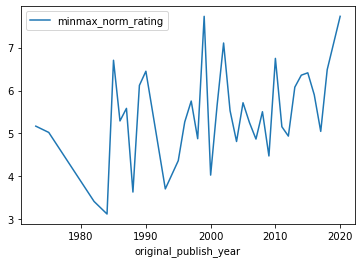

In [3]:
#for minmax_norm_rating we need to use 
df['minmax_norm_rating'] = 1.0 + (df['avg_rating']-df['avg_rating'].min())/(df['avg_rating'].max()-df['avg_rating'].min())*9.0

#for mean_norm_rating we need to use 
df['mean_norm_rating'] = 1.0 + (df['avg_rating']-df['avg_rating'].mean())/(df['avg_rating'].max()-df['avg_rating'].min())*9.0

ratings_per_publication_year=pd.pivot_table(data=df, index='original_publish_year', values='minmax_norm_rating', aggfunc=np.mean)

#with this pivot table, you can see the minmax_norm_ratings grouped per year
# Group the books by original_publish_year and get the mean of the minmax_norm_ratings of the groups
ratings_per_publication_year.plot()




In [4]:
#Create a function that given an author as input it returns her/his book with the highest minmax_norm_ratings.

#def max_minmaxrating_book(person):
#    ratings_per_author
#    selectedType = df[df["author"] == person]
#    selectedTypeAndYear = selectedType.loc[selectedType["Year"] == selectedType["Year"].max(),:]
#maxValue = selectedTypeAndYear["Number"].max()
#    return ratings_per_author

#print("The minmaxrating ")
    